In [3]:
import numpy as np
import pandas as pd

import smote_variants as sv

df_train = pd.read_csv('data.csv') # use your data


target_count = df_train.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [2]:
features = list(df_train.columns)
features.remove('target')

x, y = df_train[features].values, df_train['target'].values

In [3]:
import matplotlib.pyplot as plt
x_list = {}
y_list = {}
def plot_2d_space(X, y, title='Classes'):   
    global x_list
    global y_list
    x_list[title] = X
    y_list[title] = y
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    
    indexes = [np.random.randint(len(X)) for _ in range(50)]
    
    sample_x = np.array([X[i] for i in indexes])
    sample_y = np.array([y[i] for i in indexes])
    
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            sample_x[sample_y==l, 0],
            sample_x[sample_y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(title)
    plt.legend(loc='upper right')
    #plt.savefig('plots/{}_plot.svg'.format(label))
    plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(x)
X, x_test, y, y_test = train_test_split(X, y, test_size=0.3)

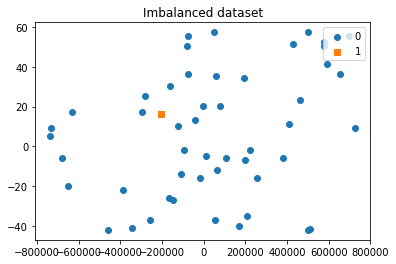

In [5]:
plot_2d_space(X, y, 'Imbalanced dataset')

Using TensorFlow backend.


Removed indexes: [284355 411917 278154 ... 416607 416637 416640]


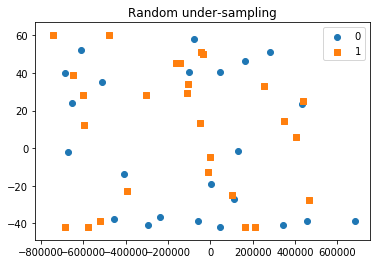

In [6]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

print('Removed indexes:', id_rus)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

386000 new random picked points


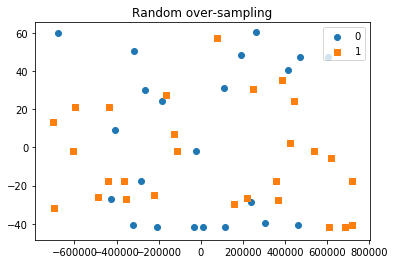

In [7]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

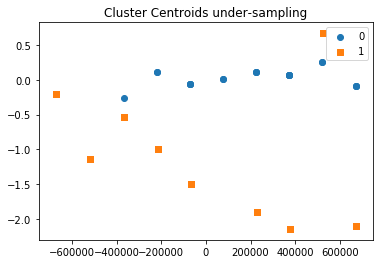

In [8]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={0: 10, 1: 10})
X_cc, y_cc = cc.fit_sample(X, y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

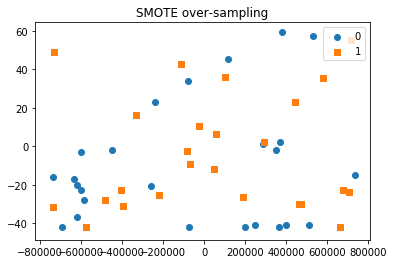

In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

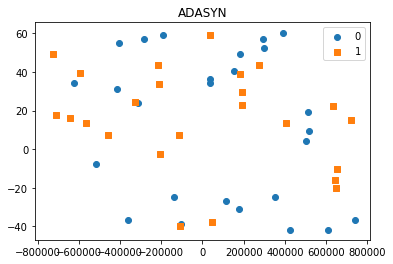

In [10]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(ratio='minority')
X_ada, y_ada = ada.fit_resample(X, y)

plot_2d_space(X_ada, y_ada, 'ADASYN')

Removed indexes: [     0      1      2 ... 416645 416646 416647]


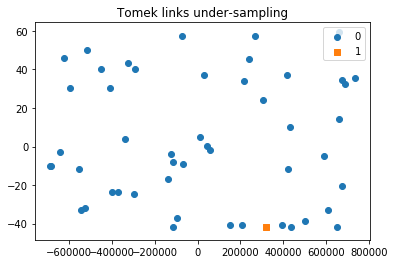

In [11]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

print('Removed indexes:', id_tl)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

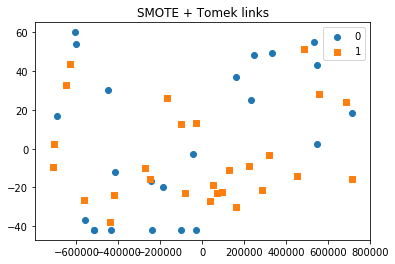

In [12]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

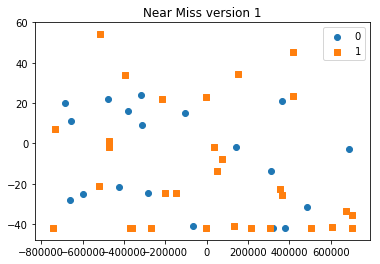

In [13]:
from imblearn.under_sampling import NearMiss 

nm = NearMiss(version=1)
X_nm, y_nm = nm.fit_sample(X, y)

plot_2d_space(X_nm, y_nm, 'Near Miss version 1')

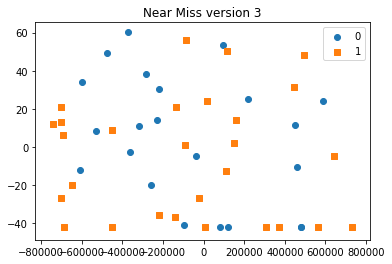

In [14]:
nm = NearMiss(version=3)
X_nm3, y_nm3 = nm.fit_sample(X, y)

plot_2d_space(X_nm3, y_nm3, 'Near Miss version 3')

2019-11-12 21:23:18,024:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


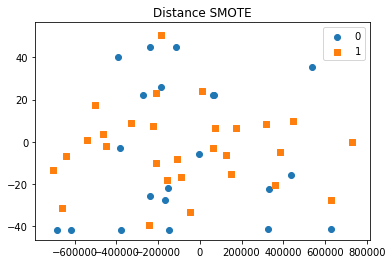

In [15]:
dist_smt = sv.distance_SMOTE()
X_dist_smt, y_dist_smt = dist_smt.sample(X, y)

plot_2d_space(X_dist_smt, y_dist_smt, 'Distance SMOTE')

2019-11-12 21:23:28,886:INFO:cluster_SMOTE: Running sampling via ('cluster_SMOTE', "{'proportion': 1.0, 'n_neighbors': 3, 'n_clusters': 3, 'n_jobs': 1, 'random_state': None}")


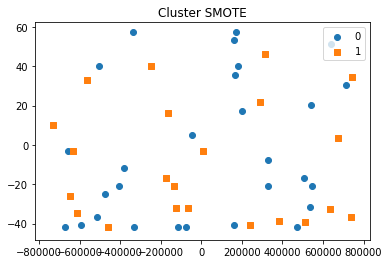

In [16]:
clu_smt = sv.cluster_SMOTE()
X_clu_smt, y_clu_smt = clu_smt.sample(X, y)

plot_2d_space(X_clu_smt, y_clu_smt, 'Cluster SMOTE')

2019-11-12 21:26:59,831:INFO:Gaussian_SMOTE: Running sampling via ('Gaussian_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'sigma': 1.0, 'n_jobs': 1, 'random_state': None}")


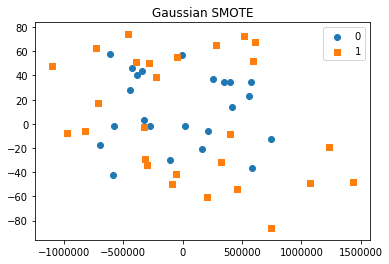

In [17]:
gau_smt = sv.Gaussian_SMOTE()
X_gau_smt, y_gau_smt = gau_smt.sample(X, y)

plot_2d_space(X_gau_smt, y_gau_smt, 'Gaussian SMOTE')

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import *

metrics = []
for k in x_list.keys():
    
    
    x, y, l = x_list[k], y_list[k], len(x_list[k])
    models = [
        LogisticRegression(C=2, solver='lbfgs'),
        DecisionTreeClassifier(max_depth=25),
        RandomForestClassifier(n_estimators=15),
        AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=25)),
        XGBClassifier()
    ]
    for model in models:
        metric_dict = {}
        metric_dict['Method'] = k
        
        print('Training {} on a {}'.format(k, type(model).__name__))
        
        model.fit(x, y)
        y_pred = model.predict(x_test)

        model_name = type(model).__name__
        metric_dict['Model'] = model_name

        accuracy = accuracy_score(y_test, y_pred)
        metric_dict['Accuracy'] = accuracy

        precision = precision_score(y_test, y_pred)
        metric_dict['Precision'] = precision

        recall = recall_score(y_test, y_pred)
        metric_dict['Recall'] = recall

        f1 = f1_score(y_test, y_pred)
        metric_dict['F1-Score'] = f1
        
        metric_dict['Training set size'] = int(l*3//10)
        metric_dict['Testing set size'] = int(len(y_test)*3//10)

        metrics.append(metric_dict)

    

metrics = pd.DataFrame(metrics)
metrics

Training Imbalanced dataset on a LogisticRegression


/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Training Imbalanced dataset on a DecisionTreeClassifier
Training Imbalanced dataset on a RandomForestClassifier
Training Imbalanced dataset on a AdaBoostClassifier
Training Imbalanced dataset on a XGBClassifier


/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Training Random under-sampling on a LogisticRegression
Training Random under-sampling on a DecisionTreeClassifier
Training Random under-sampling on a RandomForestClassifier
Training Random under-sampling on a AdaBoostClassifier
Training Random under-sampling on a XGBClassifier
Training Random over-sampling on a LogisticRegression
Training Random over-sampling on a DecisionTreeClassifier
Training Random over-sampling on a RandomForestClassifier
Training Random over-sampling on a AdaBoostClassifier
Training Random over-sampling on a XGBClassifier
Training Cluster Centroids under-sampling on a LogisticRegression
Training Cluster Centroids under-sampling on a DecisionTreeClassifier
Training Cluster Centroids under-sampling on a RandomForestClassifier
Training Cluster Centroids under-sampling on a AdaBoostClassifier
Training Cluster Centroids under-sampling on a XGBClassifier
Training SMOTE over-sampling on a LogisticRegression
Training SMOTE over-sampling on a DecisionTreeClassifier
Traini

/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Training SMOTE + Tomek links on a LogisticRegression
Training SMOTE + Tomek links on a DecisionTreeClassifier
Training SMOTE + Tomek links on a RandomForestClassifier
Training SMOTE + Tomek links on a AdaBoostClassifier
Training SMOTE + Tomek links on a XGBClassifier
Training Near Miss version 1 on a LogisticRegression
Training Near Miss version 1 on a DecisionTreeClassifier
Training Near Miss version 1 on a RandomForestClassifier
Training Near Miss version 1 on a AdaBoostClassifier
Training Near Miss version 1 on a XGBClassifier
Training Near Miss version 3 on a LogisticRegression
Training Near Miss version 3 on a DecisionTreeClassifier
Training Near Miss version 3 on a RandomForestClassifier
Training Near Miss version 3 on a AdaBoostClassifier
Training Near Miss version 3 on a XGBClassifier
Training Distance SMOTE on a LogisticRegression
Training Distance SMOTE on a DecisionTreeClassifier
Training Distance SMOTE on a RandomForestClassifier
Training Distance SMOTE on a AdaBoostClassif

,Accuracy,F1-Score,Method,Model,Precision,Recall,Testing set size,Training set size
0,0.964327,0.000000,Imbalanced dataset,LogisticRegression,0.000000,0.000000,53569,124994
1,0.957438,0.010932,Imbalanced dataset,DecisionTreeClassifier,0.031963,0.006593,53569,124994
2,0.962238,0.003252,Imbalanced dataset,RandomForestClassifier,0.027848,0.001727,53569,124994
3,0.950225,0.020930,Imbalanced dataset,AdaBoostClassifier,0.035081,0.014914,53569,124994
4,0.964327,0.000000,Imbalanced dataset,XGBClassifier,0.000000,0.000000,53569,124994
5,0.499087,0.066482,Random under-sampling,LogisticRegression,0.035608,0.500000,53569,9194
6,0.558976,0.072306,Random under-sampling,DecisionTreeClassifier,0.039086,0.481790,53569,9194
7,0.517574,0.070061,Random under-sampling,RandomForestClassifier,0.037617,0.509419,53569,9194
8,0.513289,0.069626,Random under-sampling,AdaBoostClassifier,0.037361,0.510518,53569,9194
9,0.603974,0.076887,Random under-sampling,XGBClassifier,0.041930,0.462323,53569,9194


In [21]:
metrics.to_csv('metrics.csv', index=None)

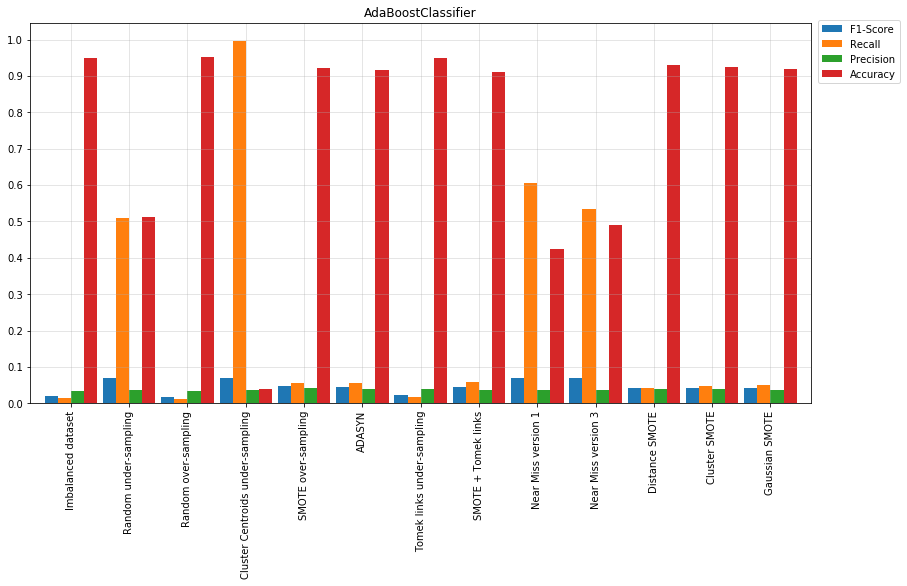

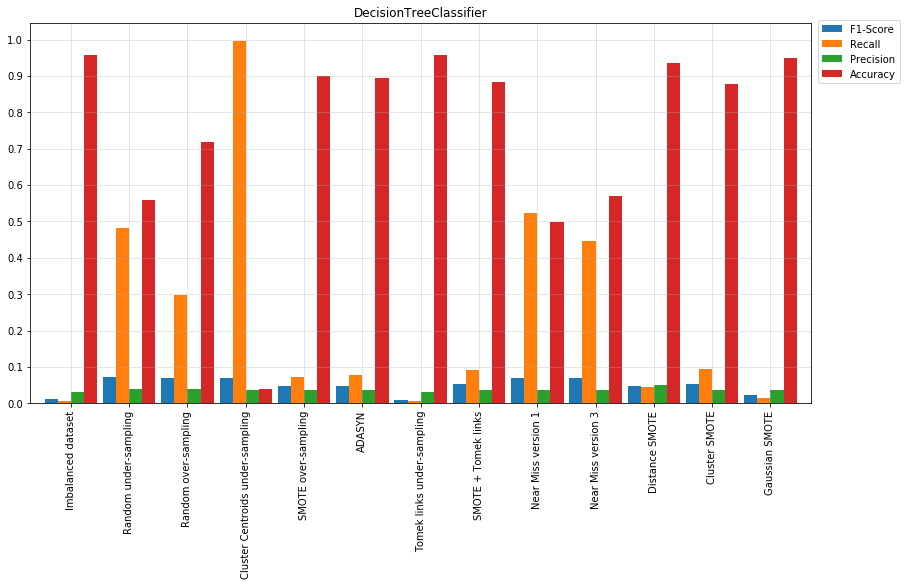

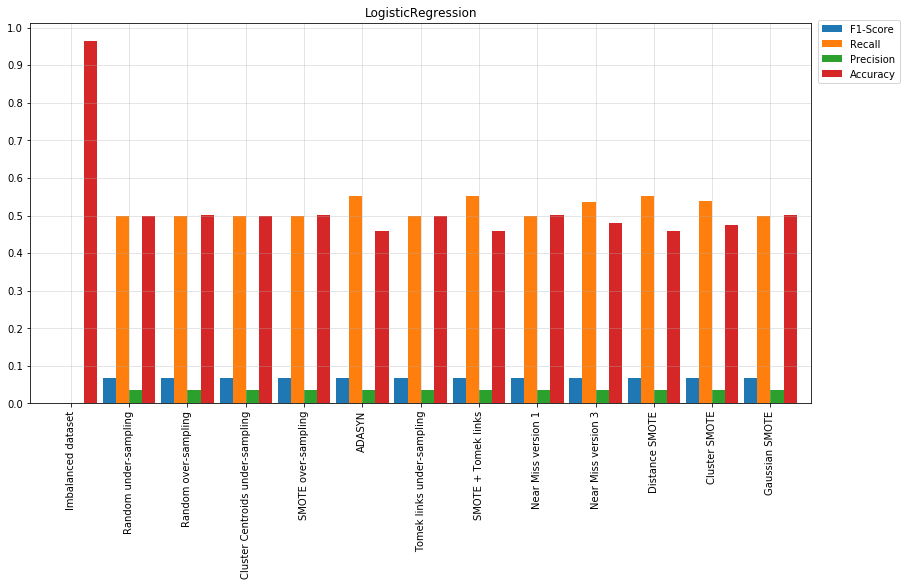

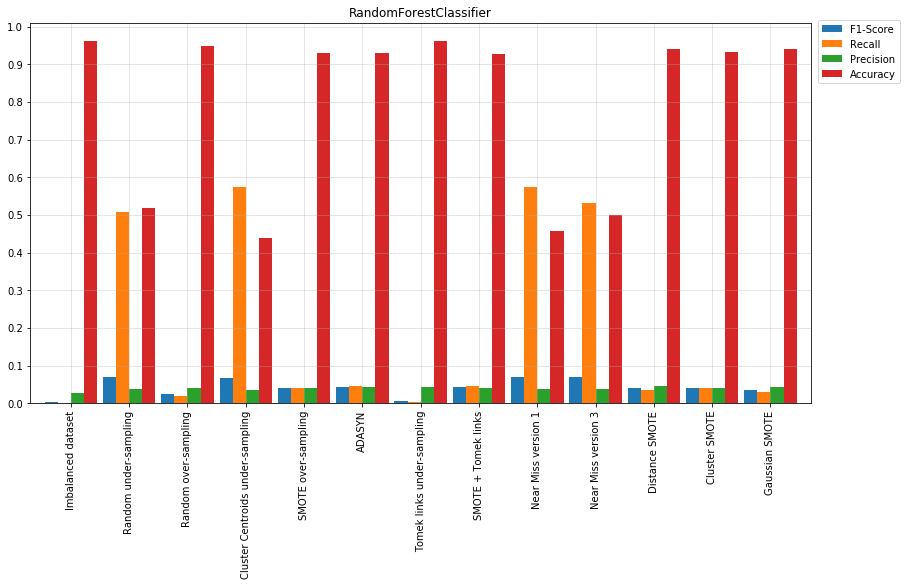

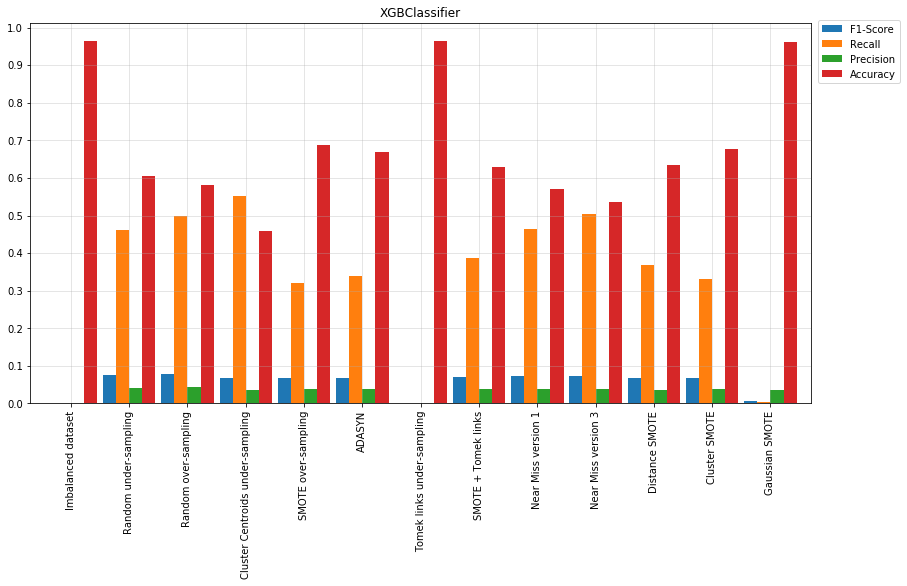

In [68]:
mod_names = np.unique(metrics['Model'].values)
for mo in mod_names:
    by_model = metrics.where(metrics.Model == mo)
    by_model = by_model.dropna(axis=0)
    axes = by_model.plot.bar(rot=90, x='Method', y=['F1-Score', 'Recall', 'Precision', 'Accuracy'], title=mo, 
                            figsize=(14, 7), width=.9, edgecolor='none')
    axes.xaxis.set_label_text('')
    axes.yaxis.set_ticks([step for step in np.linspace(0, 1, 11)])
    axes.legend(loc='upper right', ncol=1, bbox_to_anchor=(1.12, 1.02))
    axes.grid(alpha=0.4)

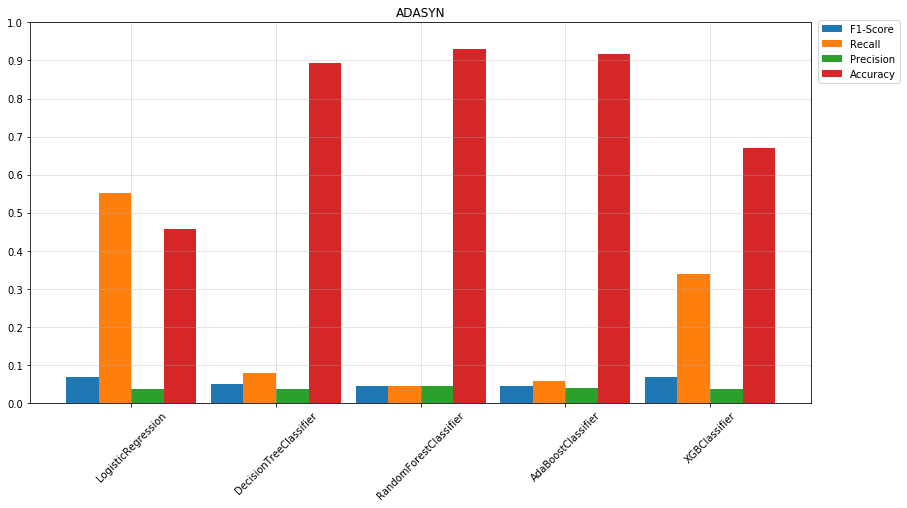

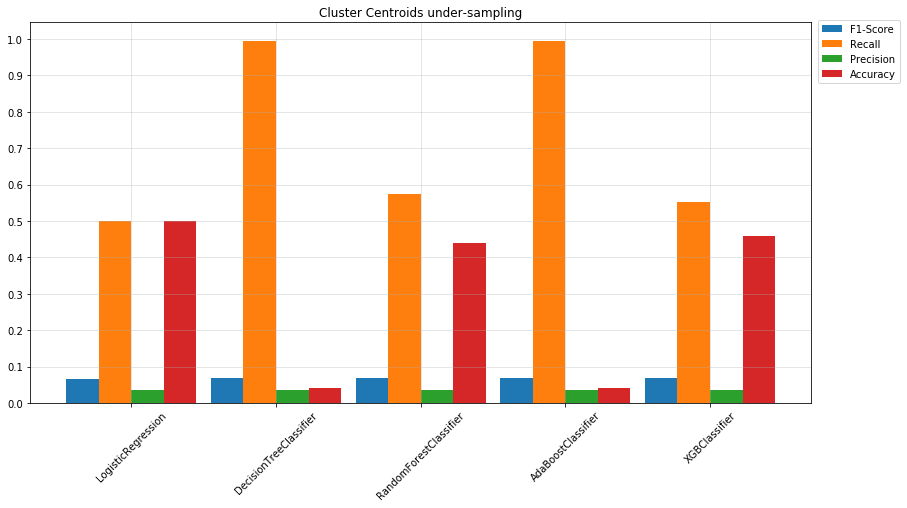

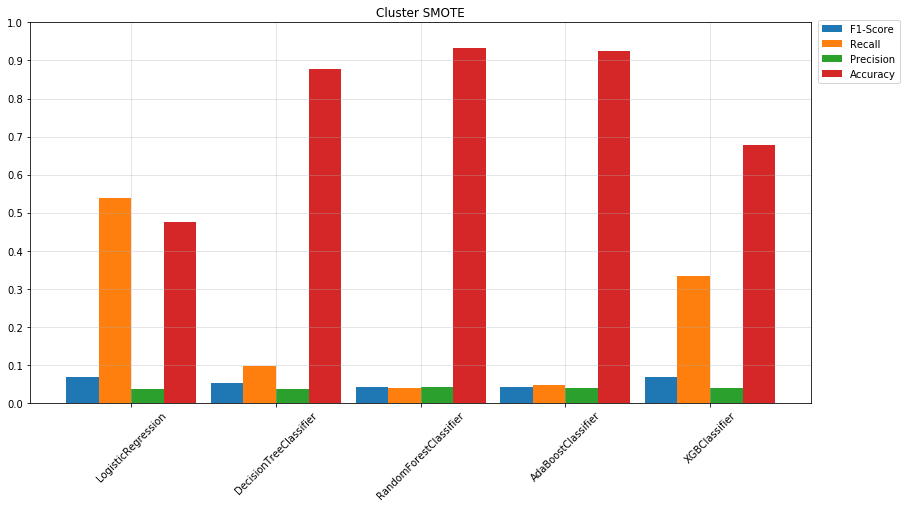

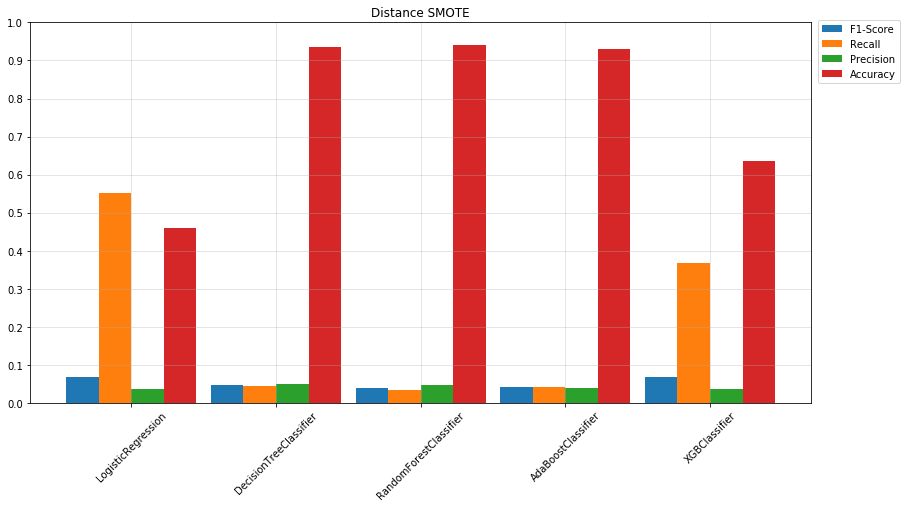

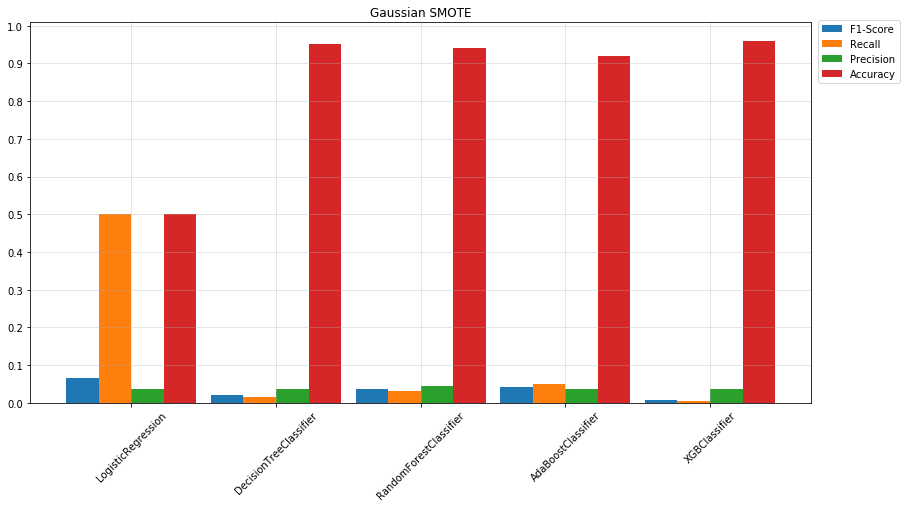

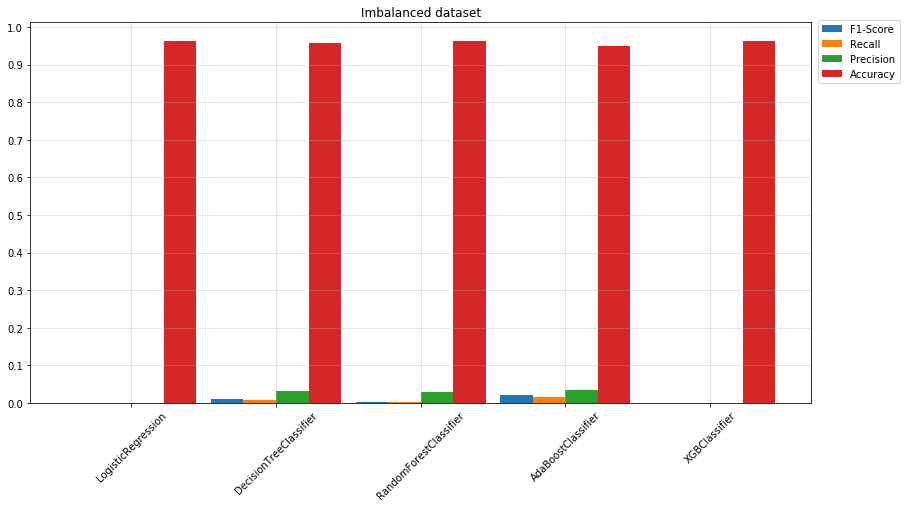

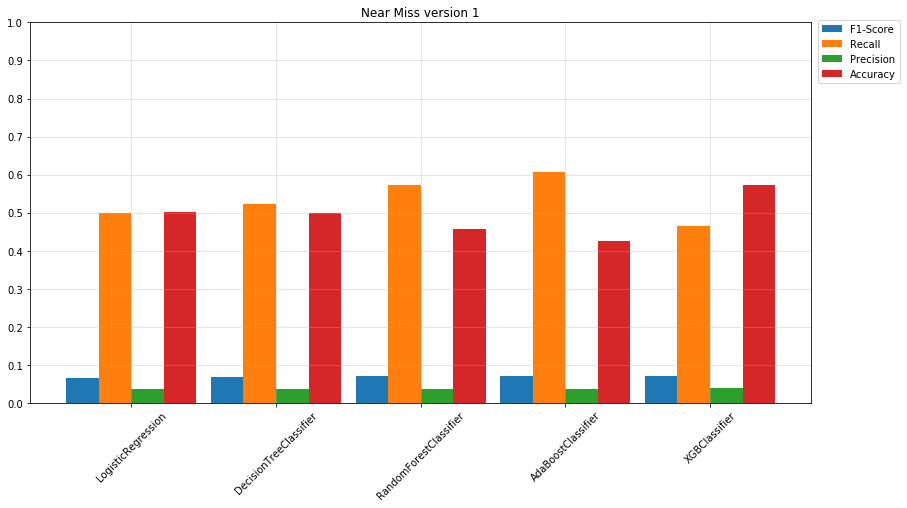

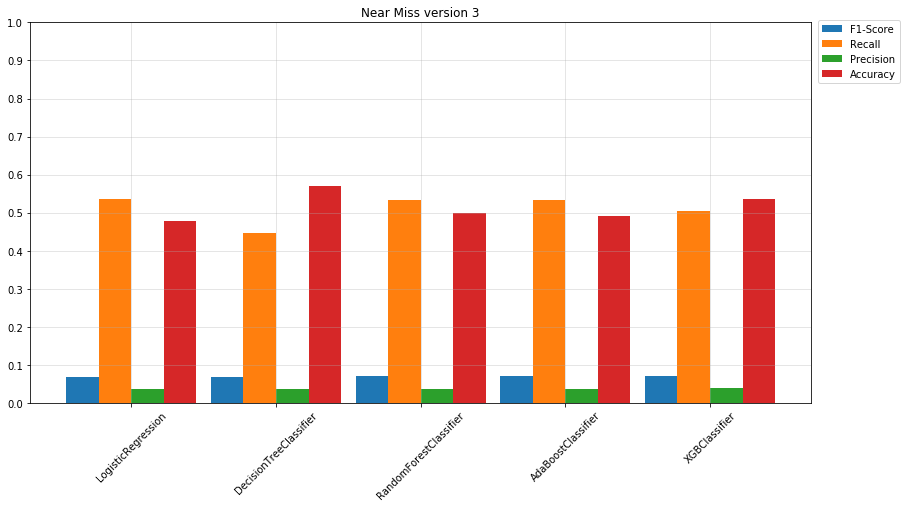

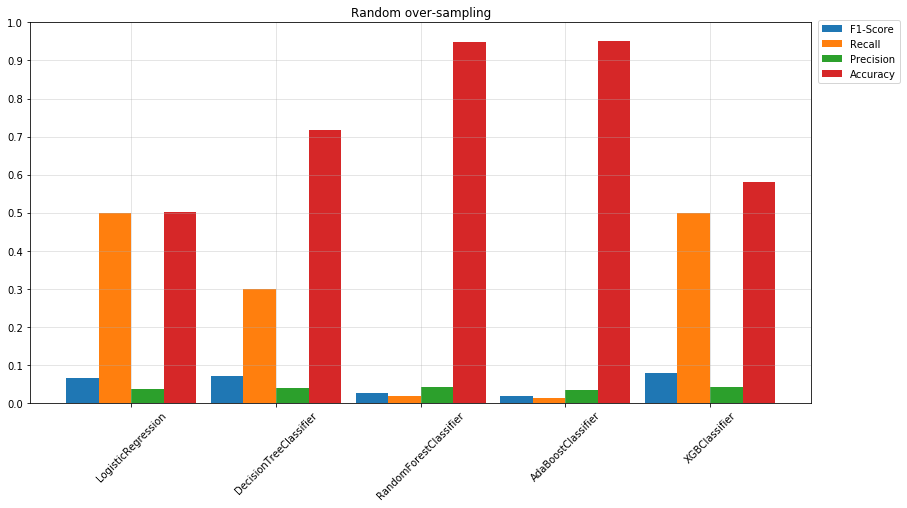

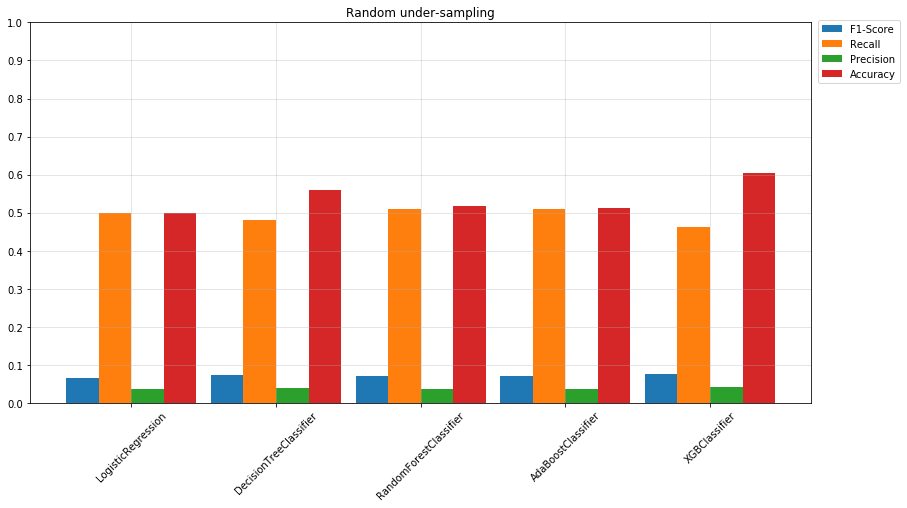

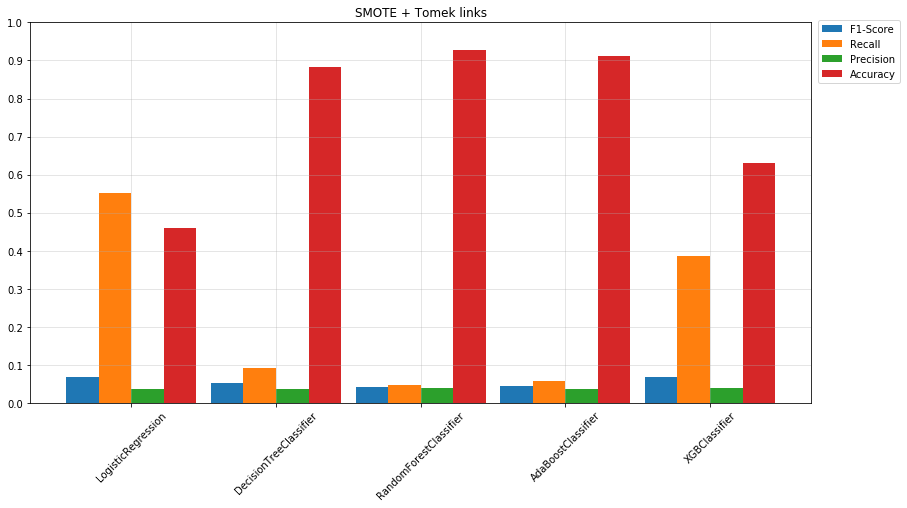

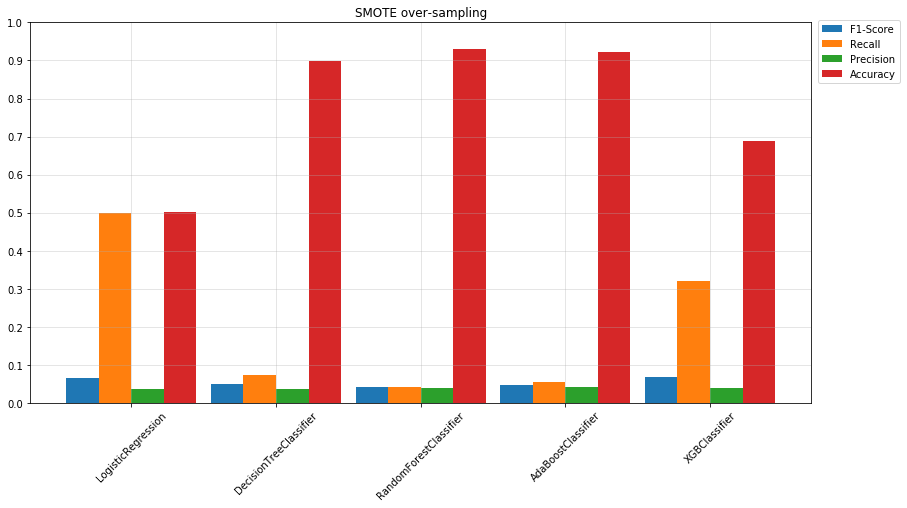

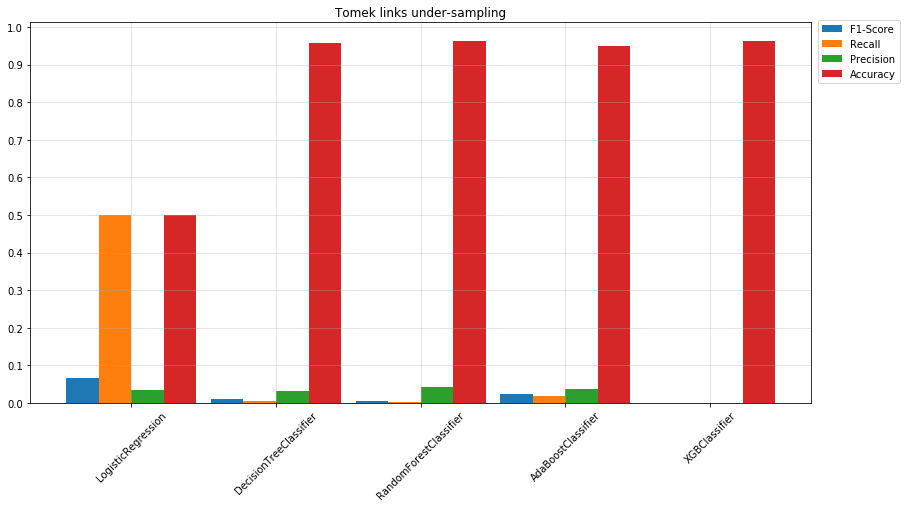

In [66]:
algo_names = np.unique(metrics['Method'].values)

for alg in algo_names:
    by_algo = metrics.where(metrics.Method == alg)
    by_algo = by_algo.dropna(axis=0)
    axes = by_algo.plot.bar(rot=45, x='Model', y=['F1-Score', 'Recall', 'Precision', 'Accuracy'], title=alg, 
                            figsize=(14, 7), width=.9, edgecolor='none')
    axes.xaxis.set_label_text('')
    axes.yaxis.set_ticks([step for step in np.linspace(0, 1, 11)])
    axes.legend(loc='upper right', ncol=1, bbox_to_anchor=(1.12, 1.02))
    axes.grid(alpha=0.4)
    